<div style="background: url(background.jpeg) no-repeat;background-size:cover;
-webkit-mask-image:-webkit-gradient(linear, left top, left bottom, from(rgba(0,0,0,1)), to(rgba(0,0,0,0)));
      mask-image: linear-gradient(to bottom, rgba(0,0,0,1), rgba(0,0,0,0));
  height: 300px;
  width: 100%;
  border: solid 1px #000;
  box-sizing: border-box;
  ">

</div>
<h1 style="text-align:center;top:200px;left:0;right:0;position:absolute;font-weight:900;">Prediktivno Bankarstvo</h1>


In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.feature_selection import VarianceThreshold, SelectPercentile, mutual_info_classif
from sklearn.ensemble import *
from sklearn.linear_model import *
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, precision_score, recall_score, confusion_matrix, log_loss, auc
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, IsolationForest
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from collections import Counter
from itertools import pairwise
from sklearn.neighbors import NearestNeighbors
from imblearn.combine import SMOTEENN
from sklearn.neighbors import KDTree

In [3]:
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(context='notebook', palette='viridis')

In [4]:
df = pd.read_csv('bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [154]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [105]:
# Check for missing values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [106]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
numerical = ['duration', 'campaign', 'pdays', 'previous', 'age',
             'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

objects = ['marital', 'education', 'housing', 'default', 'loan',
           'contact', 'month', 'day_of_week', 'poutcome', 'job']

In [9]:
for o in objects:
    print(o.capitalize() + ':\n', df[o].unique())

Marital:
 ['married' 'single' 'divorced' 'unknown']
Education:
 ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
Housing:
 ['no' 'yes' 'unknown']
Default:
 ['no' 'unknown' 'yes']
Loan:
 ['no' 'yes' 'unknown']
Contact:
 ['telephone' 'cellular']
Month:
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
Day_of_week:
 ['mon' 'tue' 'wed' 'thu' 'fri']
Poutcome:
 ['nonexistent' 'failure' 'success']
Job:
 ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']


In [5]:
duplicates = df.duplicated()
print('Broj duplikata: %d' % duplicates.sum())

Broj duplikata: 12


In [6]:
df = df.drop_duplicates(keep=False)
duplicates = df.duplicated()
print('Broj duplikata: %d' % duplicates.sum())

Broj duplikata: 0


<Axes: xlabel='y', ylabel='count'>

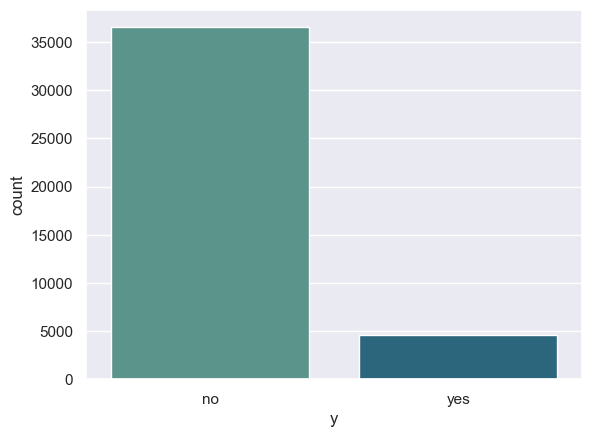

In [71]:
fig, ax = plt.subplots()

sns.countplot(x='y', data=df,
              palette=sns.color_palette("crest", 2))

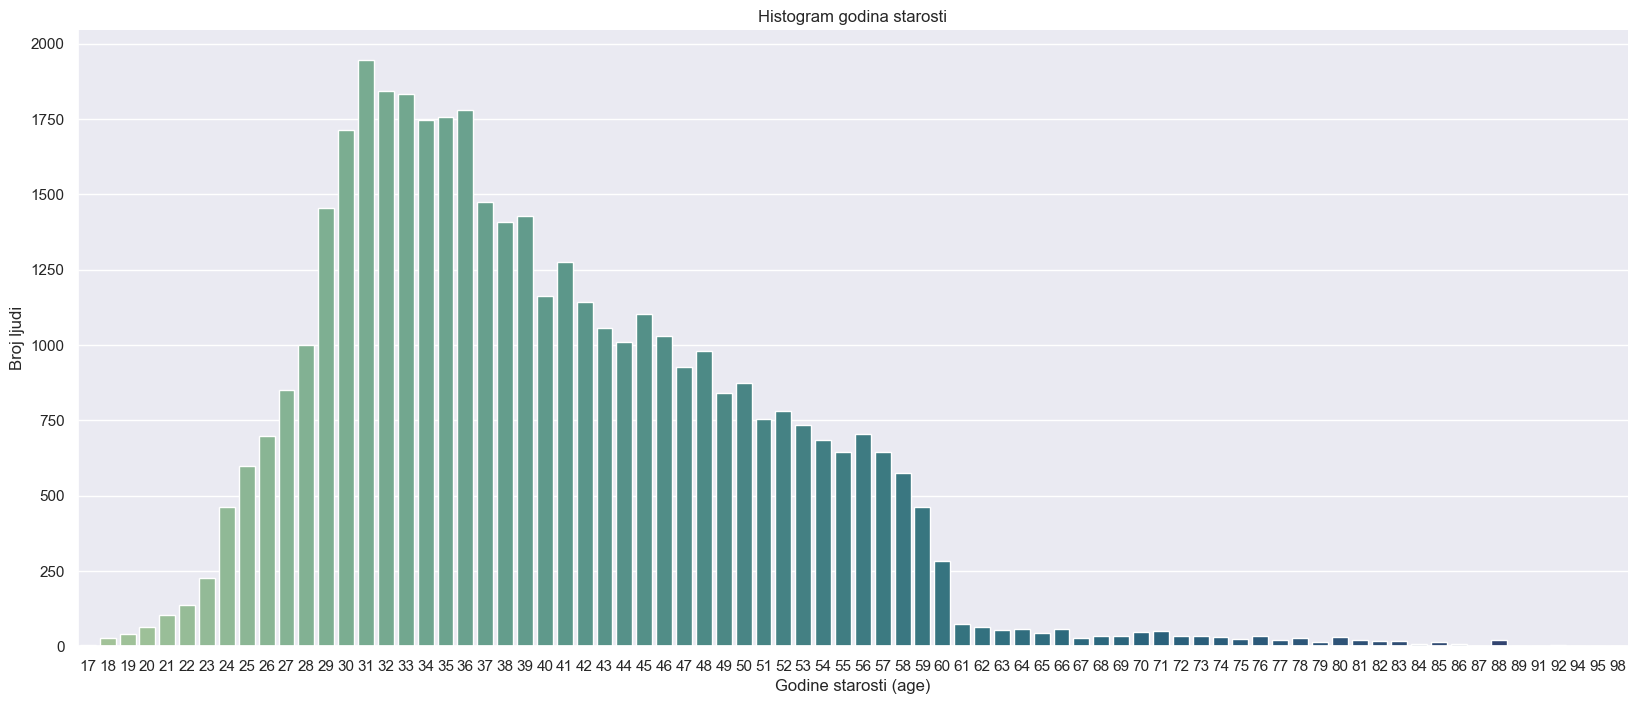

In [36]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x='age', data=df, palette="crest")
ax.set_xlabel('Godine starosti (age)')
ax.set_ylabel('Broj ljudi')
ax.set_title('Histogram godina starosti')
sns.despine()

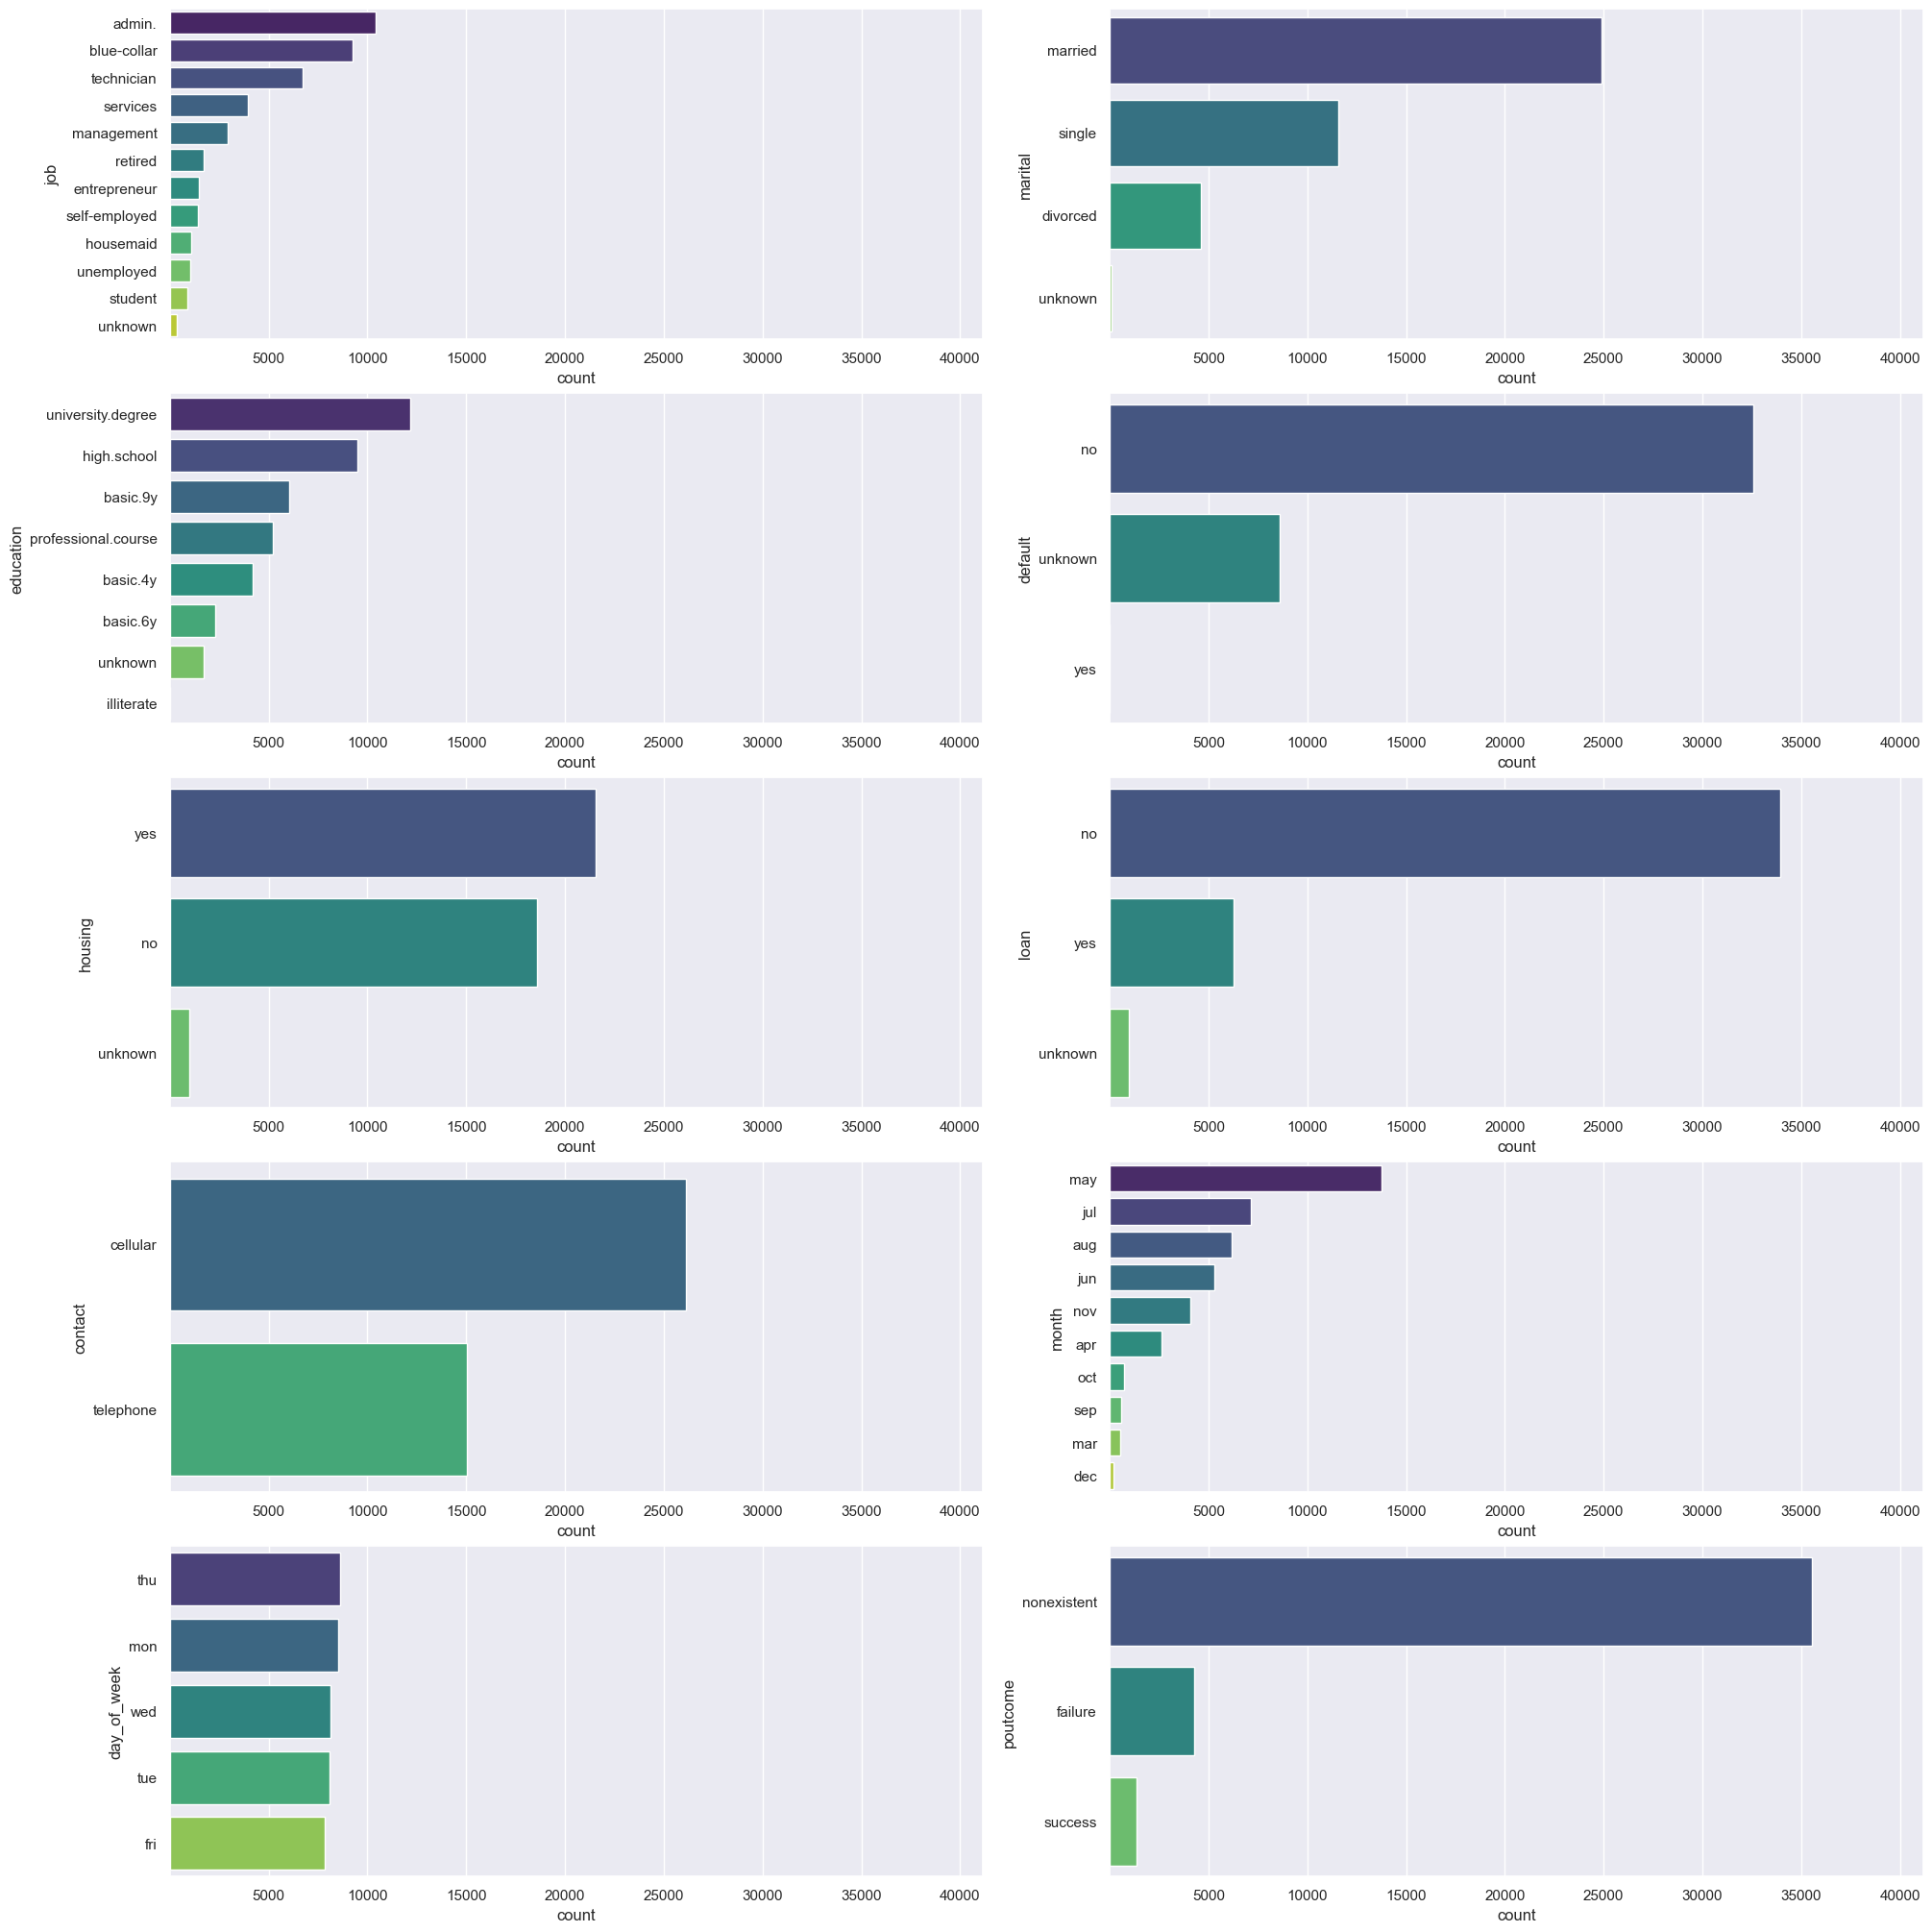

In [17]:
fig, axs = plt.subplots(5, 2, figsize=(20, 20), constrained_layout=True)
categorical = df.select_dtypes(include='object').columns.tolist()
for i, f in enumerate(categorical[:-1]):
    ax = axs[i // 2][ i % 2]
    sns.countplot(y=f, data=df,
                  ax=axs[i//2][i % 2],
                  order=df[f].value_counts().index, palette='viridis')
    ax.set_xlim(1, df.shape[0])

In [52]:
#check unknown values
columns_with_unknown = ['job','housing','loan']

for val in columns_with_unknown:
    print(f'Column {val}: \n')
    print((df.groupby(val).size()/df[val].count())*100)
    

Column job: 

job
admin.           25.303663
blue-collar      22.475950
entrepreneur      3.537071
housemaid         2.575066
management        7.103294
retired           4.168691
self-employed     3.452045
services          9.632203
student           2.125644
technician       16.361384
unemployed        2.463317
unknown           0.801671
dtype: float64
Column housing: 

housing
no         45.204548
unknown     2.405014
yes        52.390438
dtype: float64
Column loan: 

loan
no         82.416675
unknown     2.405014
yes        15.178311
dtype: float64


In [53]:
columns_with_unknown = ['default','marital','education']
for val in columns_with_unknown:
    print(f'Column {val}: \n')
    print((df.groupby(val).size()/df[val].count())*100)

Column default: 

default
no         79.112817
unknown    20.879895
yes         0.007288
dtype: float64
Column marital: 

marital
divorced    11.199106
married     60.523759
single      28.082791
unknown      0.194345
dtype: float64
Column education: 

education
basic.4y               10.144787
basic.6y                5.563113
basic.9y               14.685162
high.school            23.100282
illiterate              0.043728
professional.course    12.722282
university.degree      29.540375
unknown                 4.200272
dtype: float64


In [46]:
print("Unknown education", df[df['education'] == 'illiterate'].shape)
print("Default yes", df[df['default'] == 'yes'].shape)

Unknown education (18, 21)
Default yes (3, 21)


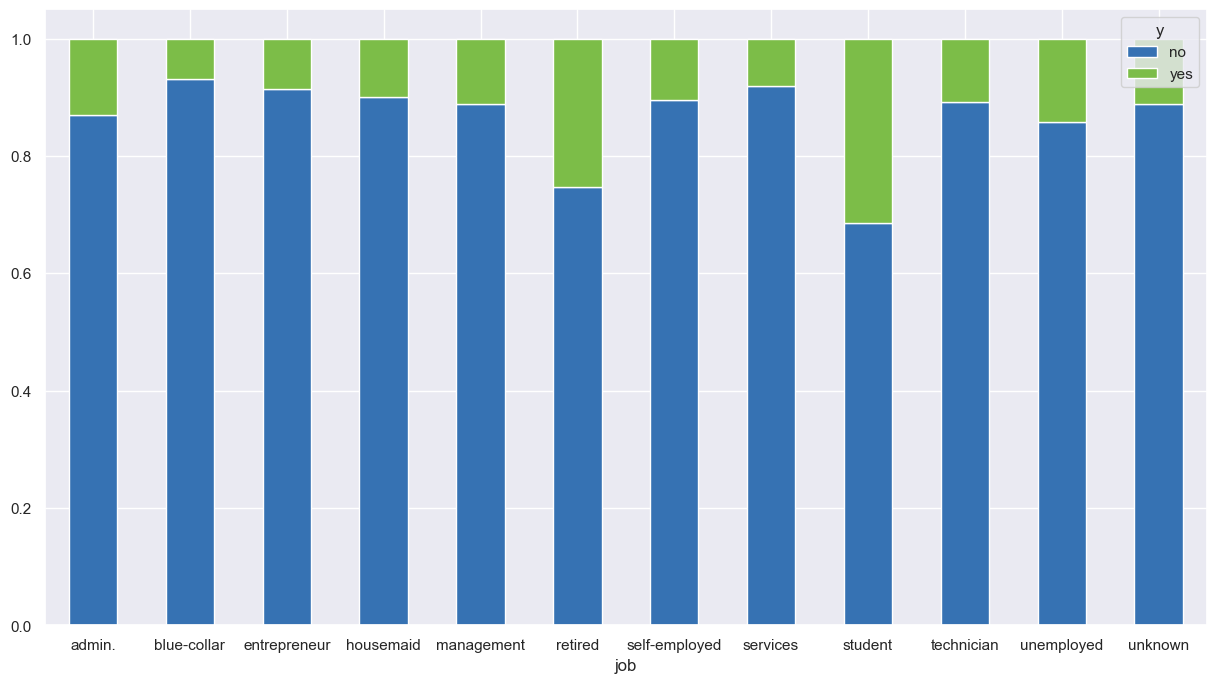

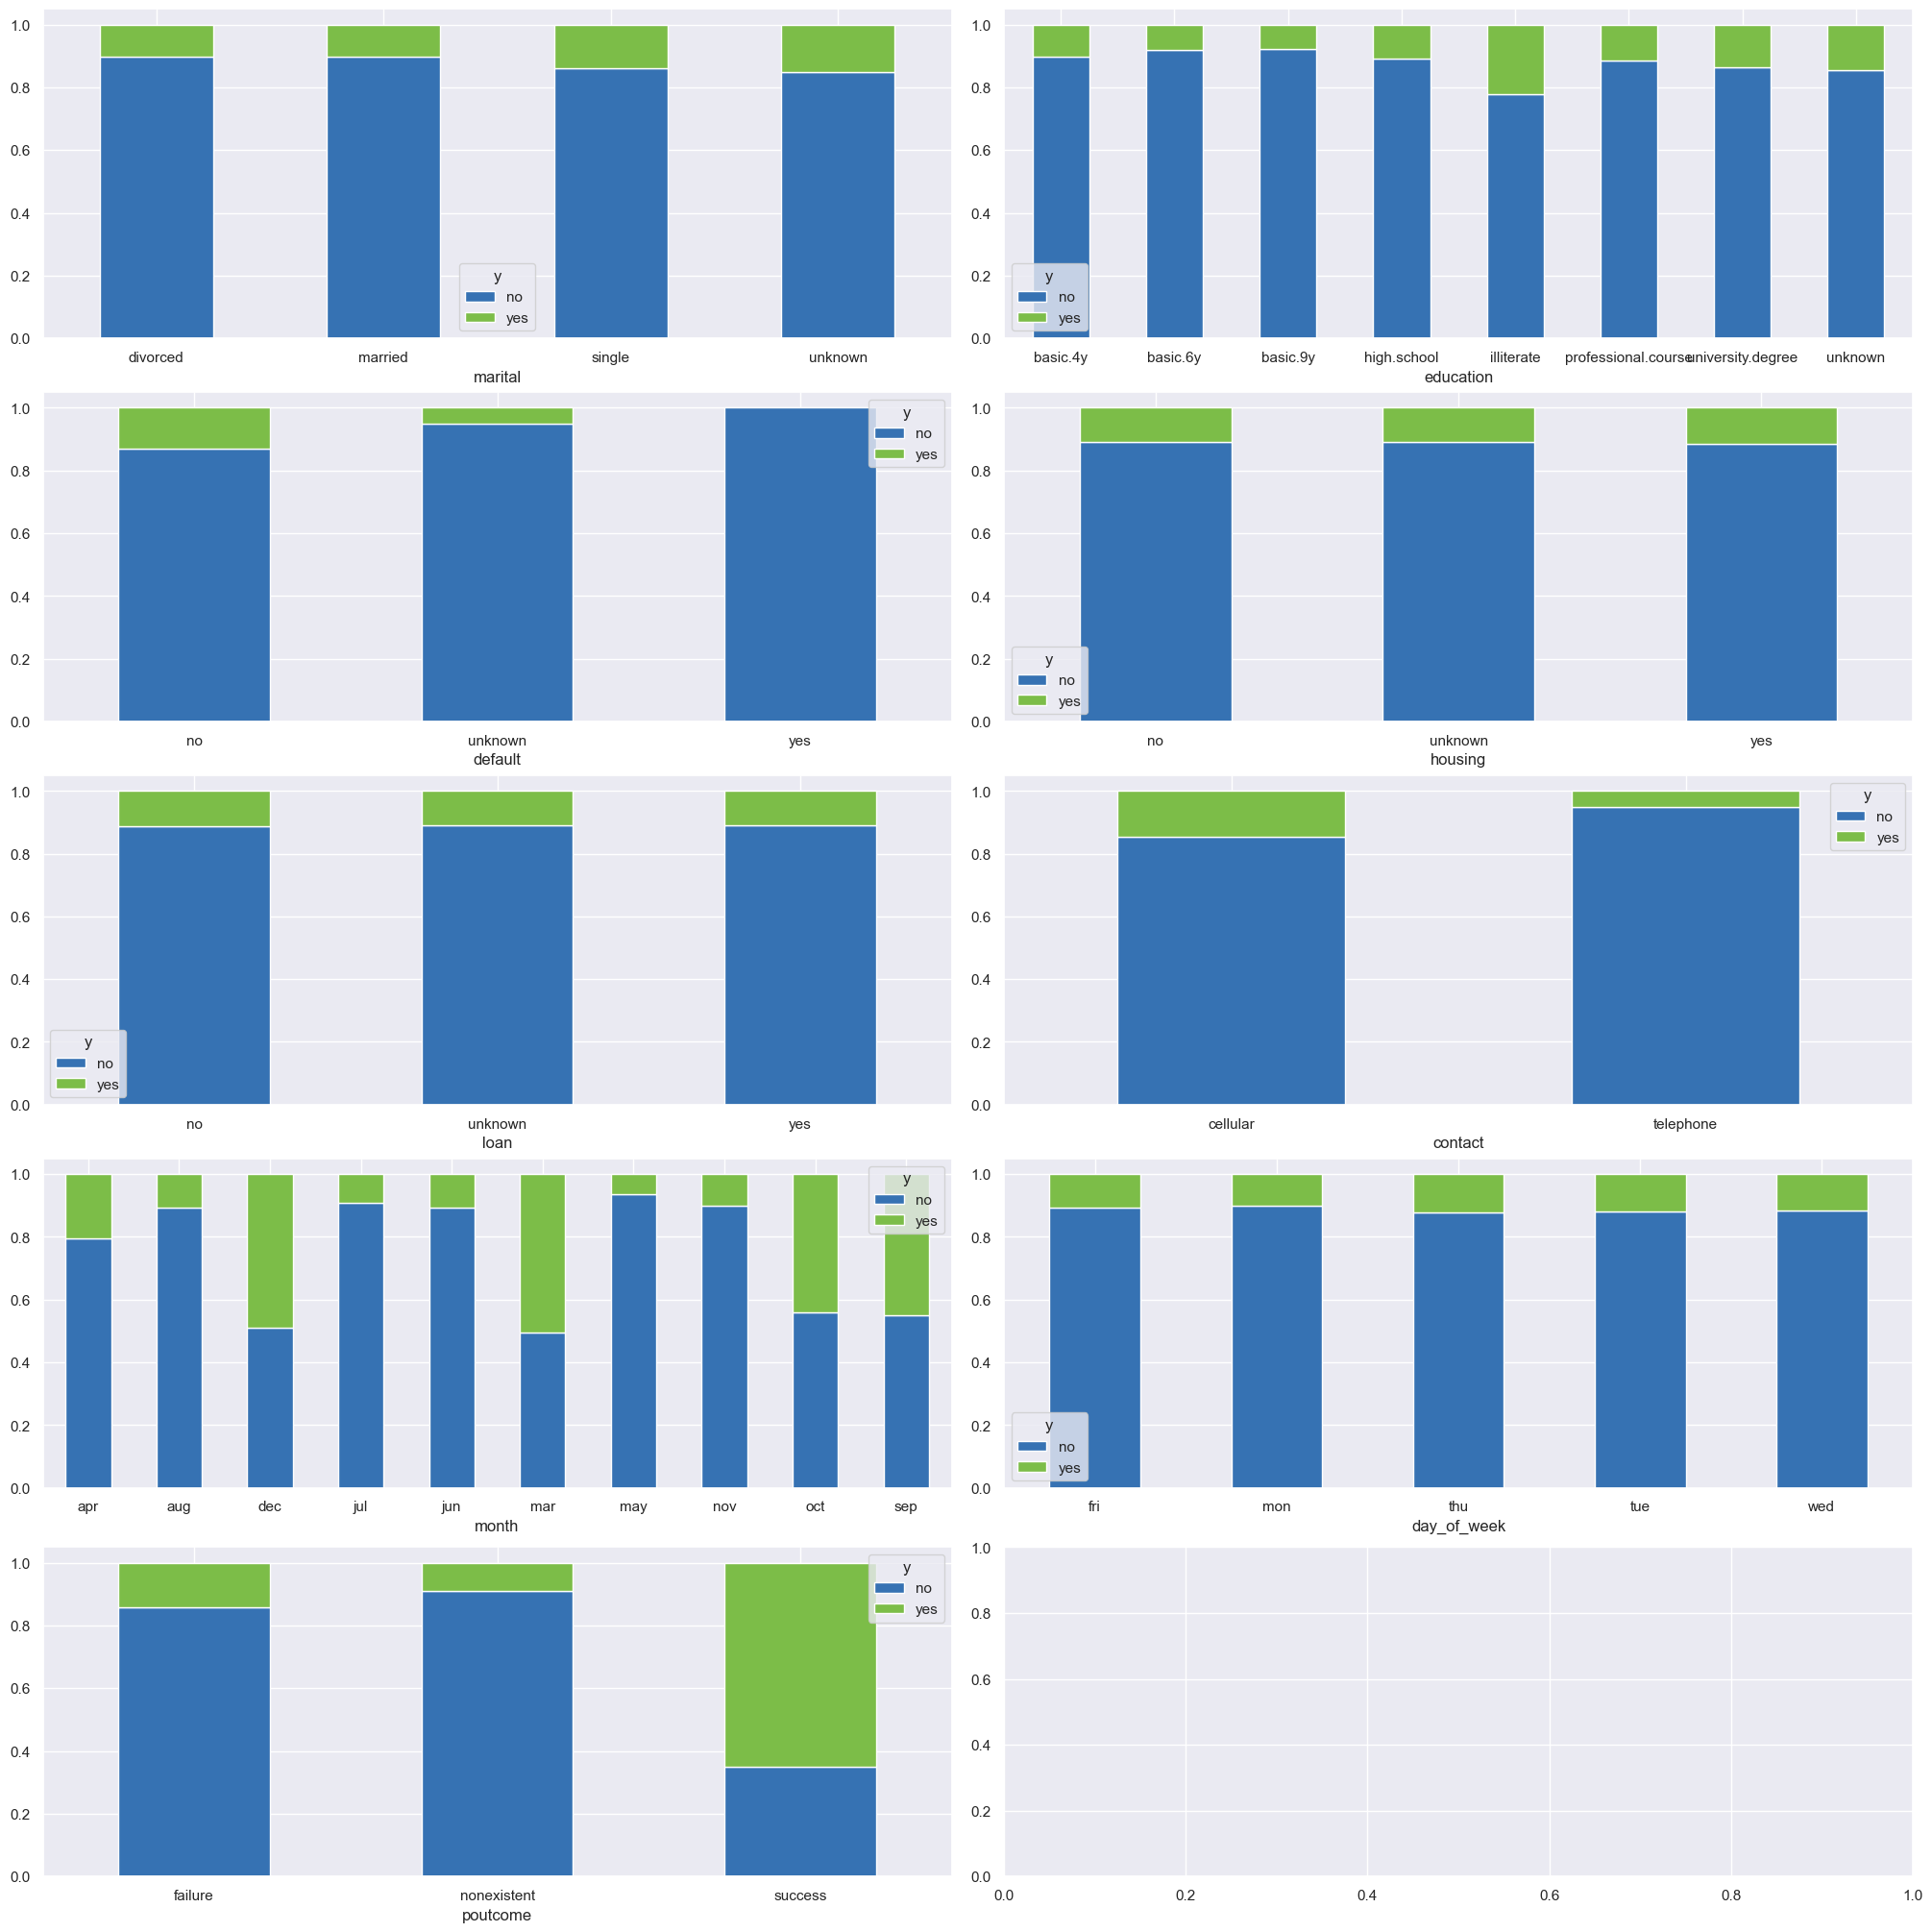

In [43]:
counts = pd.crosstab(df['job'], df['y'])
percentages = counts.div(counts.sum(1), axis=0)
percentages.plot.bar(stacked=True, rot=0, figsize=(15, 8),
                     color=['#3672b3', '#7cbd48'])
plt.show()
fig, axs = plt.subplots(5, 2, figsize=(20, 20), constrained_layout=True)
for i, f in enumerate(categorical[1:-1]):
    counts = pd.crosstab(df[f], df['y'])
    percentages = counts.div(counts.sum(1), axis=0)
    percentages.plot.bar(stacked=True, ax=axs[i//2][i % 2], rot=0,
                         color=['#3672b3', '#7cbd48'])
plt.show()

## Šta raditi sa kategoričkim podacima?

1. **job**
    - imputacija unknown (management ili najfrekventnija)
    - unknown values cine samo 0.8 % svih podataka -> ukloniti? 
2. **marital**
    - imputacija single (married)
    - unknown samo 0.2 %
3. **education**
    - izbaci illiterate (ima ih samo 18) ili ih stavi sve na basic.4y
    -illiterate cine samo 0.04% podataka -> ukloniti
4. **default**
    - izbaci yes -> proveriti poklapanje yes kolone sa unknown vrednostima u slucaju da je doslo do zabune pri popunjavanju dataset-a
    - prebaci yes u no
    - izbaci celu kolonu (vrv ovo, jer je sve unknown ili no)
5. **housing**
    - imputacija unknown sa yes (najfrekv)
    - prediktivna imputacija (mozda overkill)
    - samo ostavimo i izbacimo nakon one-hot kodiranja
    - proveriti da li mogu unknown vrednosti da se ubace u neku od kolona
6. **loan**
    - unknown imputacija u no
    - provera da li postoji poklapanje sa nekom od drugih kolona
7. **month**
    - podela na kvartale
8. **poutcome**
    - primena samo one hot


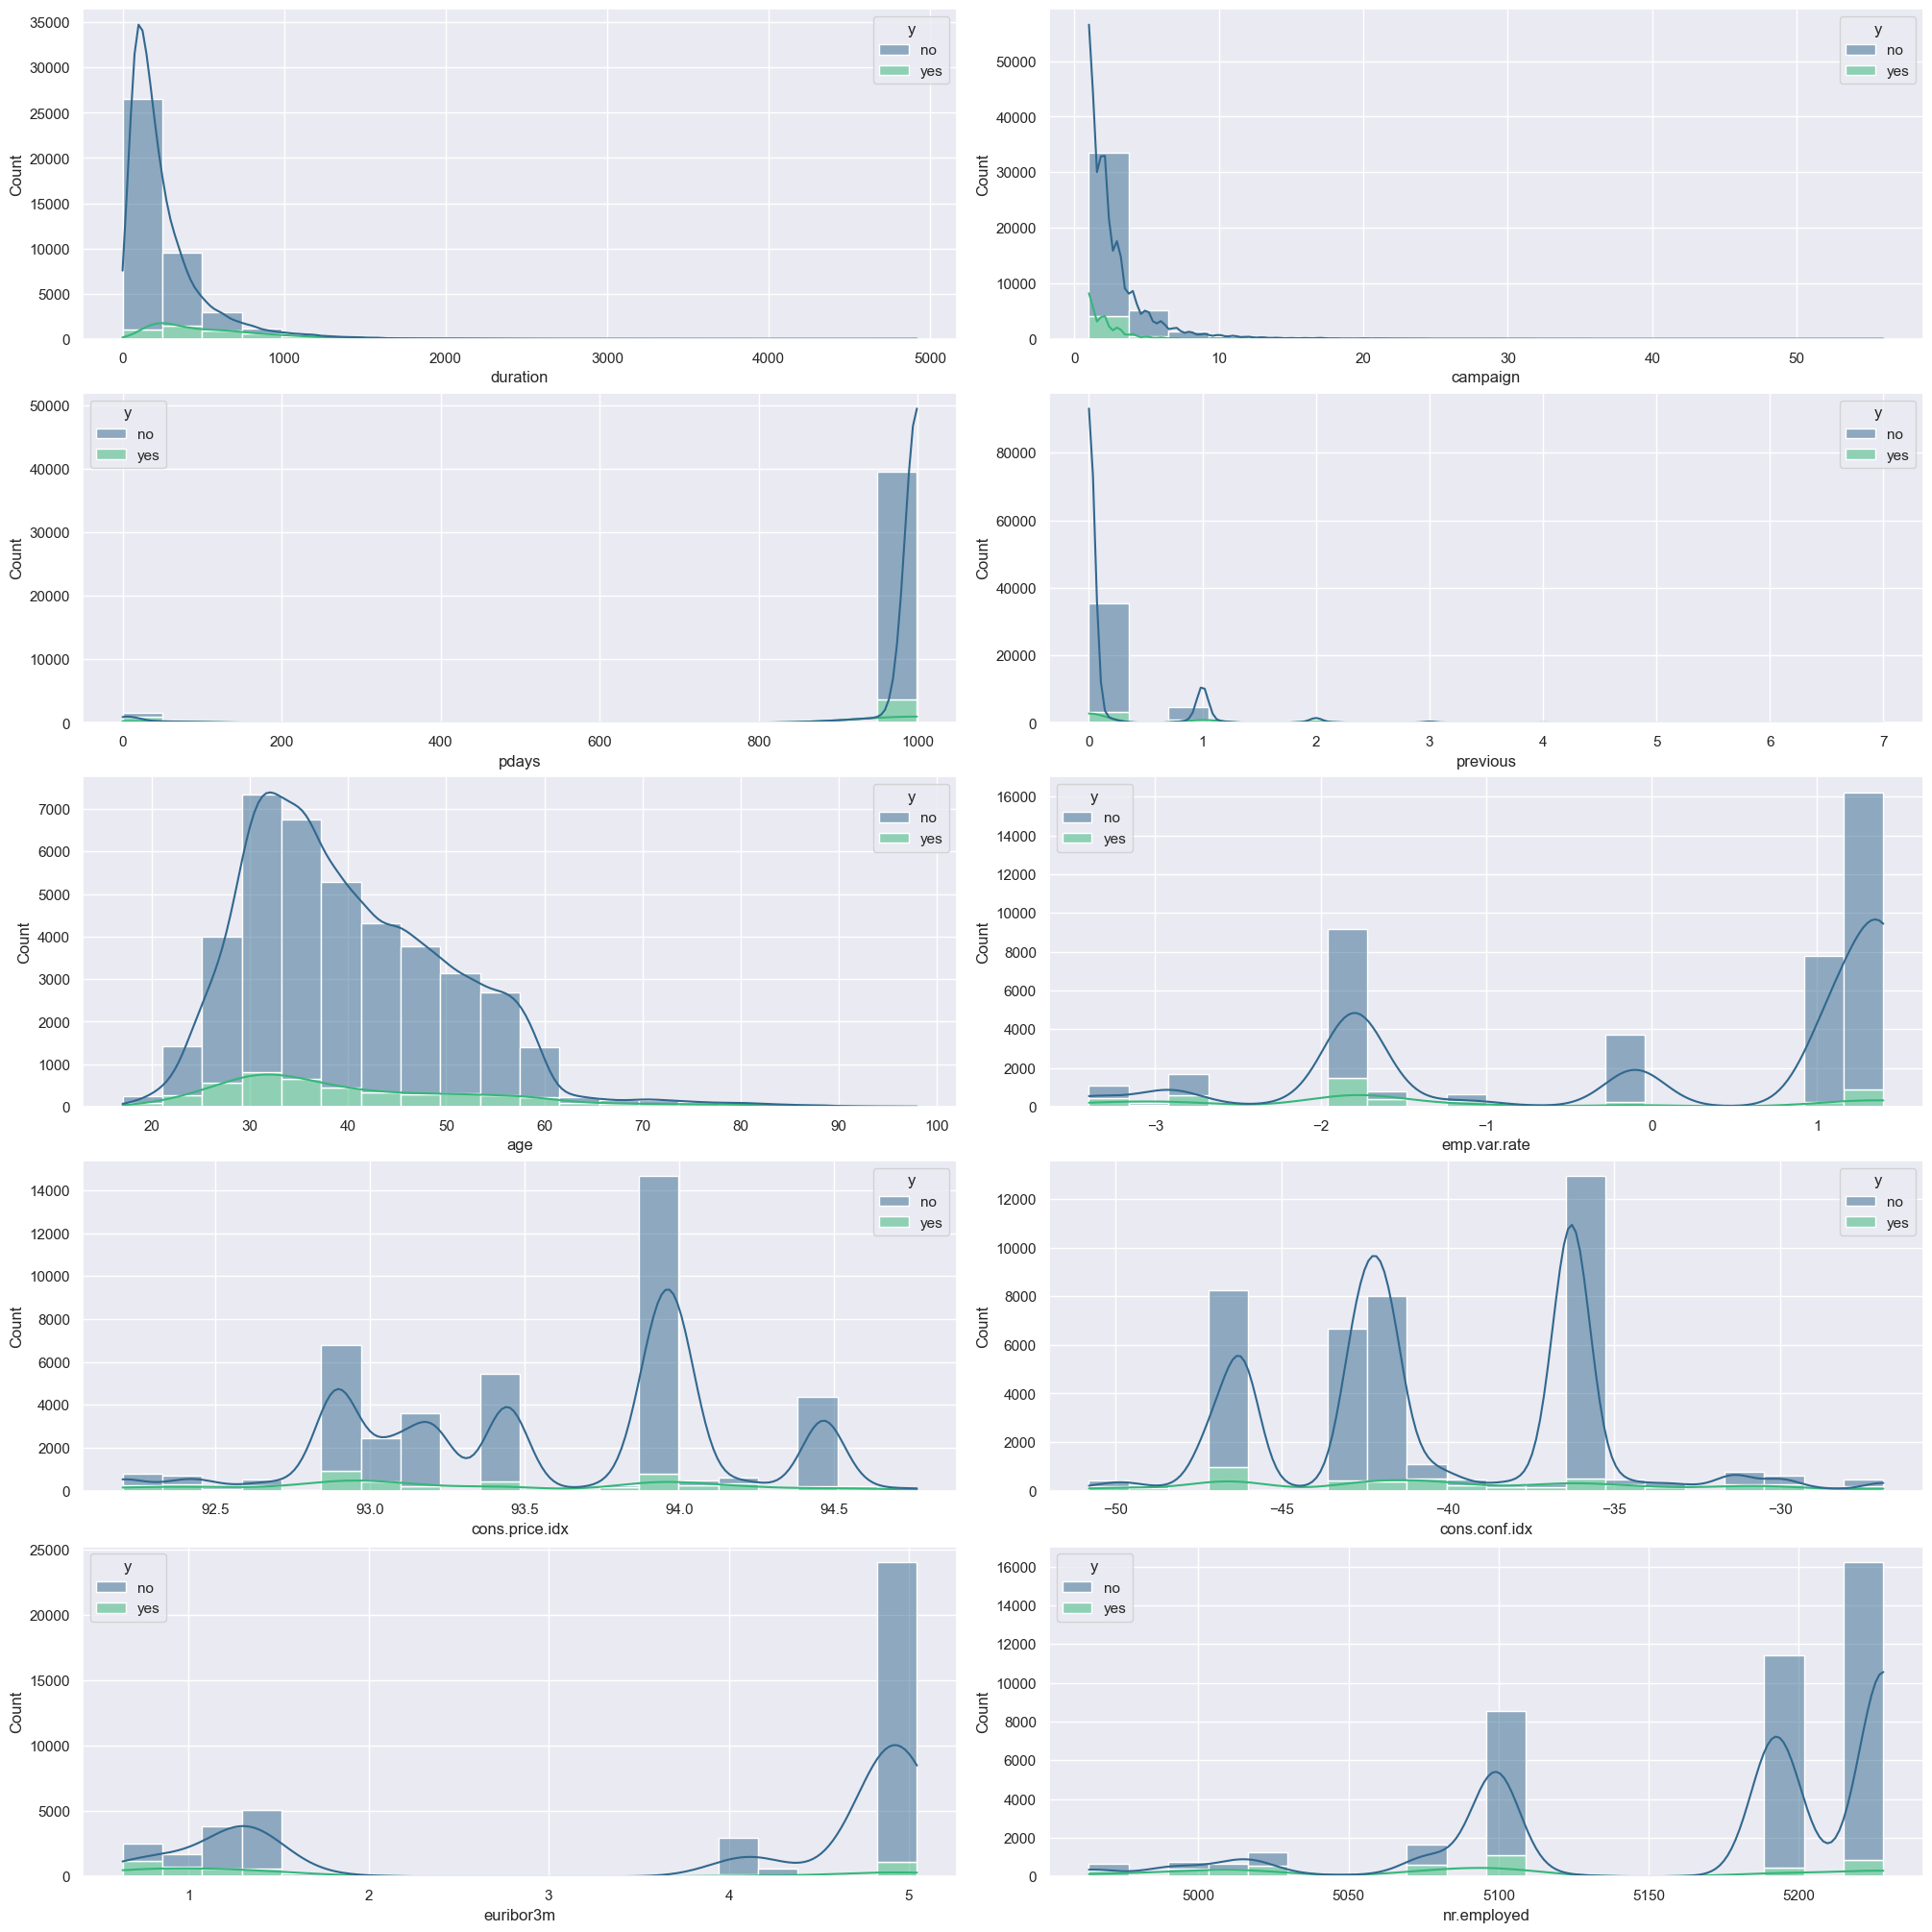

In [46]:

fig, axs = plt.subplots(len(numerical)//2, 2,
                        figsize=(20, 20), constrained_layout=True)


for i, f in enumerate(numerical):
    sns.histplot(x=f, data=df, hue='y', multiple='stack', kde=True,
                 ax=axs[i//2][i % 2], bins=20,
                 palette=sns.color_palette("viridis", 2))


plt.show()

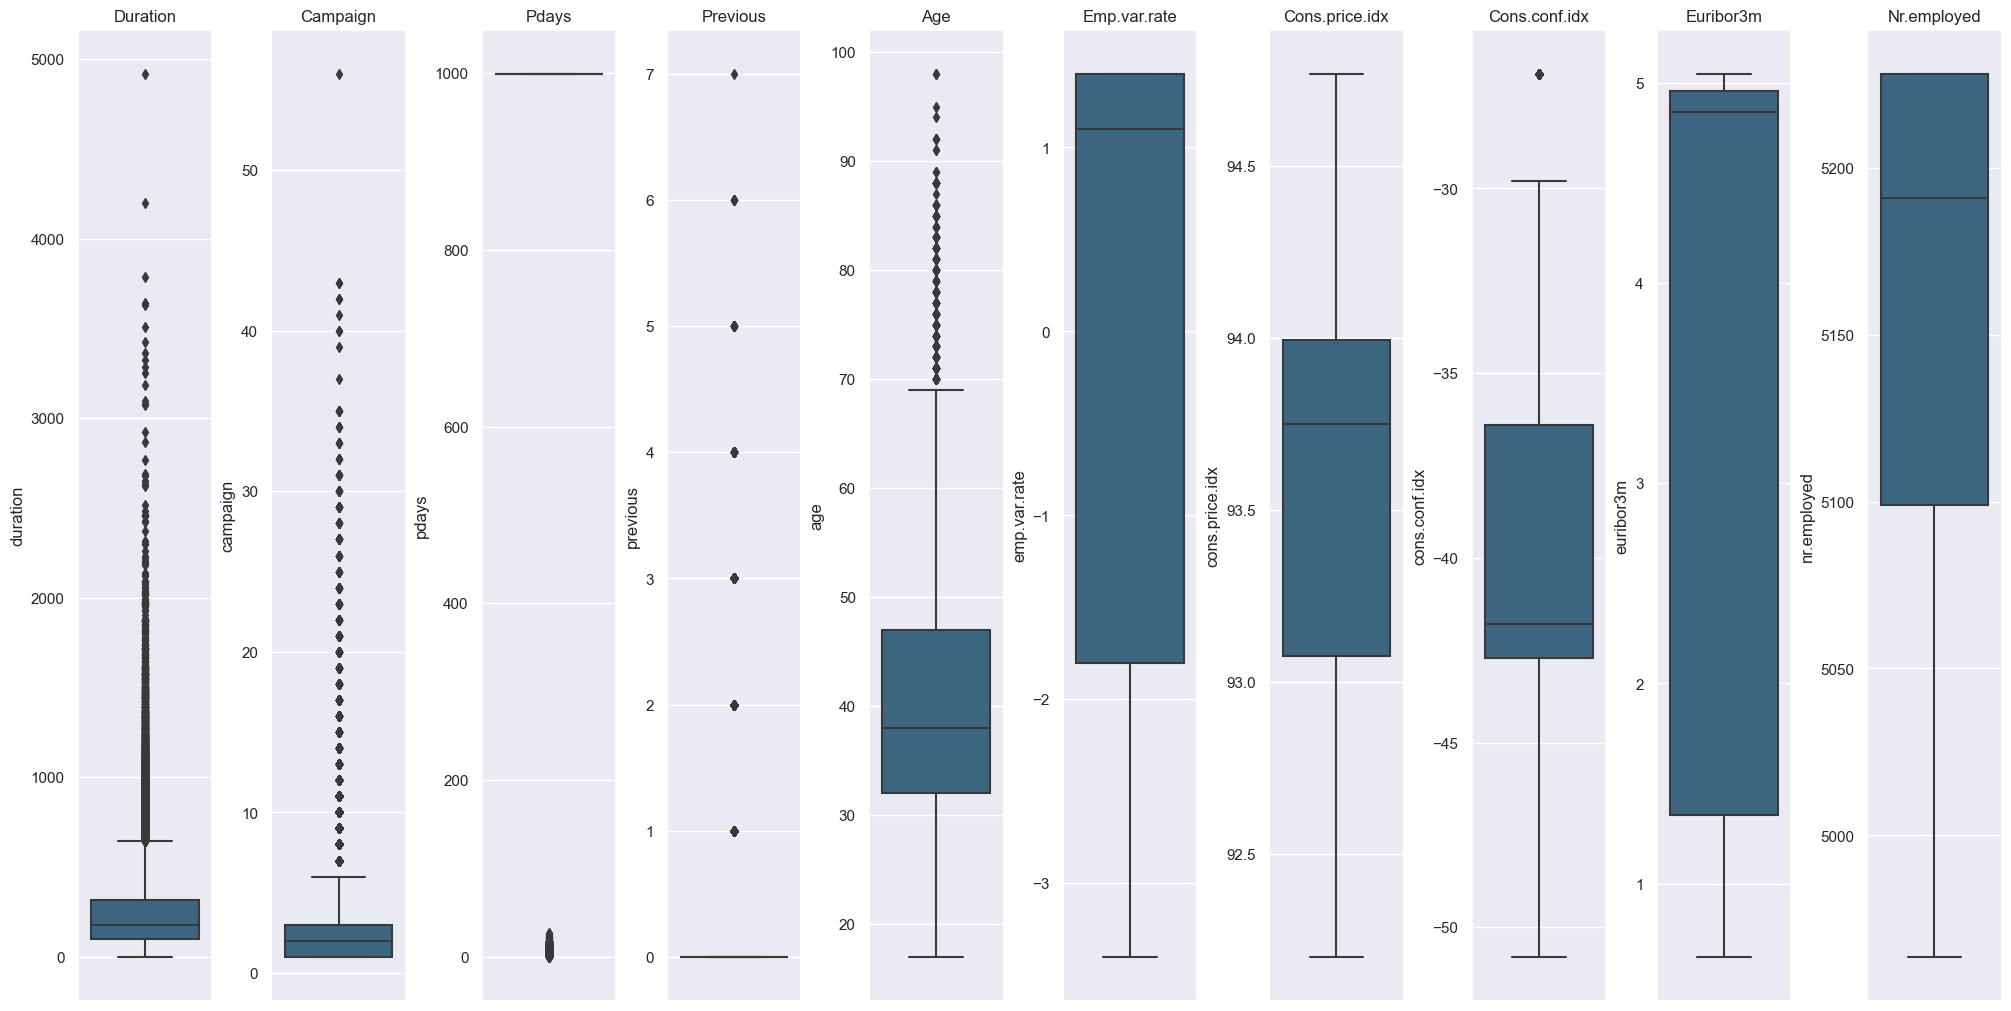

In [50]:
fig, axs = plt.subplots(1, len(numerical),
                        figsize=(20, 10), constrained_layout=True)
for i, f in enumerate(numerical):
    sns.boxplot(y=f, data=df, hue='y', ax=axs[i],
                palette=sns.color_palette("viridis", 2))
    axs[i].set_title(f.capitalize())


plt.show()

# Sta raditi sa numerickim kolonama?

1. **campaign**
    - log transform i posle eventualno IQR
2. **age**
    - IQR
3. **duration**
    - log transform pa IQR eventualno
4. **pdays**
    - diskretizuj na 0 i 1 (999 da bude 0 jer to znaci da nije kontaktiran)
5. **previous**
    - diskretizuj na 0 i 1, jer je pramalo ovih koji nisu 0
6. **cons.conf.idx**
    - IQR

-   ostalo ne diramo


## Preprocesiranje


In [4]:
# proveriti da li je ok ovo
#df = df.drop(columns=['default'])
# df.loc[df['housing'] == 'unknown', 'housing'] = 'yes' 
# df.loc[df['loan'] == 'unknown', 'loan'] = 'no'
#df.loc[df['job'] == 'unknown', 'job'] = 'admin.'
#potrebno proveriti slicnost sa ostalim kolonama da bi se odredilo gde ce se smestiti unknown

In [7]:
df = df.drop(df[df['marital'] == 'unknown'].index)
df = df.drop(df[df['job'] == 'unknown'].index)
df = df.drop(df[df['education'] == 'illiterate'].index)

In [8]:
#podrazumevano da su uklonjene unknown vrednosti
map = { 'yes' : 1 , 'no' : 0, 'unknown' : 2}
df['housing'] = df['housing'].map(map)
df['loan'] = df['loan'].map(map)
df['default'] = df['default'].map(map)

In [9]:
month_to_quarter = {
    'jan': 1, 'feb': 1, 'mar': 1,
    'apr': 2, 'may': 2, 'jun': 2,
    'jul': 3, 'aug': 3, 'sep': 3,
    'oct': 4 , 'nov': 4, 'dec': 4, 
}

# Apply the mapping
df['month'] = df['month'].map(month_to_quarter)

# Display the result
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0,0,0,telephone,2,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,2,0,0,telephone,2,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,0,1,0,telephone,2,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,0,0,0,telephone,2,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,0,0,1,telephone,2,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [58]:
df.describe()

,age,housing,loan,month,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41066.000000,41066.000000,41066.000000,41066.000000,41066.000000,41066.000000,41066.000000,41066.000000,41066.000000,41066.000000,41066.000000,41066.000000,41066.000000
mean,40.019335,0.548142,0.151780,2.567477,258.232626,2.567087,962.511713,0.172892,0.082643,93.576092,-40.502752,3.621943,5167.050528
std,10.417909,0.497683,0.358812,0.717381,259.254729,2.768620,186.822489,0.494963,1.570549,0.578684,4.626456,1.734251,72.259343
min,17.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,0.000000,0.000000,2.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,1.000000,0.000000,2.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,1.000000,0.000000,3.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,1.000000,1.000000,4.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [10]:
labels = ['contact', 'y']
for label in labels:
    label_encoder = LabelEncoder()
    label_encoder.fit(df[label])
    df[label] = label_encoder.transform(df[label])
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0,0,0,1,2,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,2,0,0,1,2,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,0,1,0,1,2,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,0,0,0,1,2,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,0,0,1,1,2,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [56]:

def remove_outliers_standard_deviation(df, features, n) -> pd.DataFrame:
    outlier_list = []

    for column in features:
        data_mean = df[column].mean()
        data_std = df[column].std()
        cut_off = data_std * 3

        outlier_list_column = df[(
            df[column] < data_mean - cut_off) | (df[column] > data_mean + cut_off)].index
        outlier_list.extend(outlier_list_column)

    return outlier_list

In [9]:
def remove_outliers_iqr(df, features) -> pd.DataFrame:

    outlier_list = []

    for column in features:
        Q1 = np.percentile(df[column], 25)
        Q3 = np.percentile(df[column], 75)

        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_column = df[(
            df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step)].index

        outlier_list.extend(outlier_list_column)

    return outlier_list

In [11]:
def isolation_forest(df,column_name,contamination):

    df2 = df

    random_state = np.random.RandomState(42)

    model=IsolationForest(n_estimators=100,max_samples='auto',contamination=float(contamination),random_state=random_state)

    model.fit(df2[[column_name]])
    
    df2['scores'] = model.decision_function(df2[[column_name]])

    df2['anomaly_score'] = model.predict(df2[[column_name]])

    return df2[df2['anomaly_score']==-1].index



In [12]:
def log_transform(df, column_name):
    minimum = df[column_name].min()
    df[column_name] = df[column_name]-minimum+1
    df[column_name] = np.log(df[column_name])

In [13]:
for column in ['campaign', 'duration']:
    log_transform(df, column)

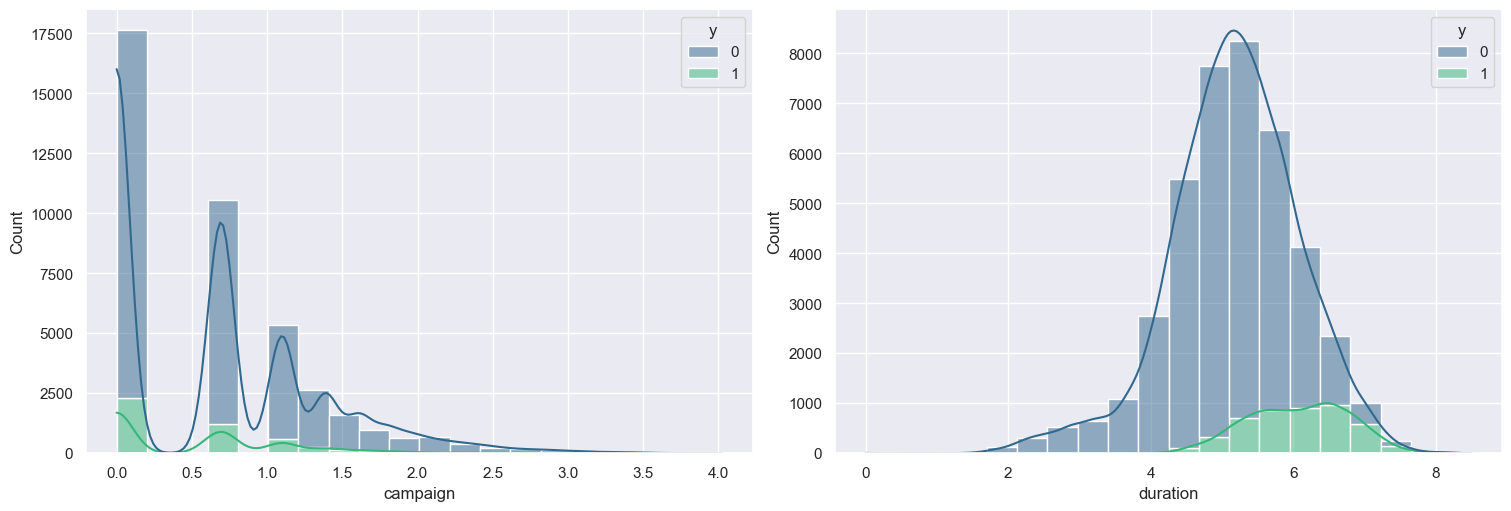

In [61]:
fig, axs = plt.subplots(1, 2,
                        figsize=(15, 5), constrained_layout=True)
for i, f in enumerate(['campaign', 'duration']):
    sns.histplot(x=f, data=df, hue='y', multiple='stack',
                 ax=axs[i], bins=20, palette='viridis', kde=True)
plt.show()

In [14]:
print(f"Pre izbacivanja: {df.shape}")

outliers_list = set()
for column in ['previous', 'campaign', 'duration', 'pdays']:
    outliers = isolation_forest(df,column, 0.02)
    outliers_list.update(outliers)
df = df.drop(outliers_list, axis=0).reset_index(drop=True)
print(f"Nakon izbacivanja: {df.shape}")
print(f"Outliers: {len(outliers_list)}")
# da li izbaciti previous i pdays?

Pre izbacivanja: (40745, 21)
Nakon izbacivanja: (38485, 23)
Outliers: 2260


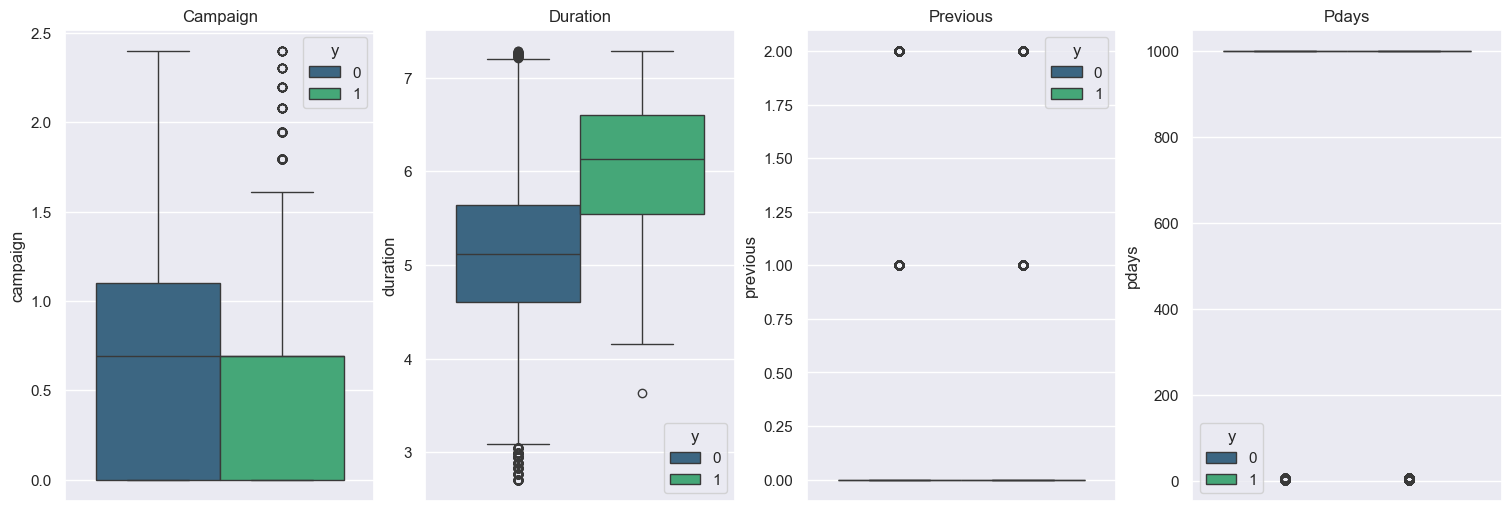

In [15]:
fig, axs = plt.subplots(1, 4, figsize=(15, 5), constrained_layout=True)
for i, f in enumerate(['campaign', 'duration', 'previous', 'pdays']):
    sns.boxplot(y=f, data=df, hue='y', ax=axs[i], palette='viridis')
    axs[i].set_title(f.capitalize())
plt.show()

In [16]:
#korisnik tek nakon punoletstva dobija dozvolu za depozit???
df = df.drop(df[df['age'] == 17].index)

In [17]:
# pametniji nacin za age
kbins_discretizer = KBinsDiscretizer(
    n_bins=5, encode='ordinal', strategy='quantile')
df['age'] = kbins_discretizer.fit_transform(df[['age']])
age_bins = list(pairwise(kbins_discretizer.bin_edges_[0].tolist()))
print(age_bins)  # use for labeling later
df.head()

[(18.0, 31.0), (31.0, 35.0), (35.0, 41.0), (41.0, 49.0), (49.0, 98.0)]


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,scores,anomaly_score
0,4.0,housemaid,married,basic.4y,0,0,0,1,2,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0.259217,1
1,4.0,services,married,high.school,2,0,0,1,2,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0.259217,1
2,2.0,services,married,high.school,0,1,0,1,2,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0.259217,1
3,2.0,admin.,married,basic.6y,0,0,0,1,2,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0.259217,1
4,4.0,services,married,high.school,0,0,1,1,2,mon,...,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0.259217,1


In [18]:
df = df.drop(columns = ['scores', 'anomaly_score'])

<Axes: >

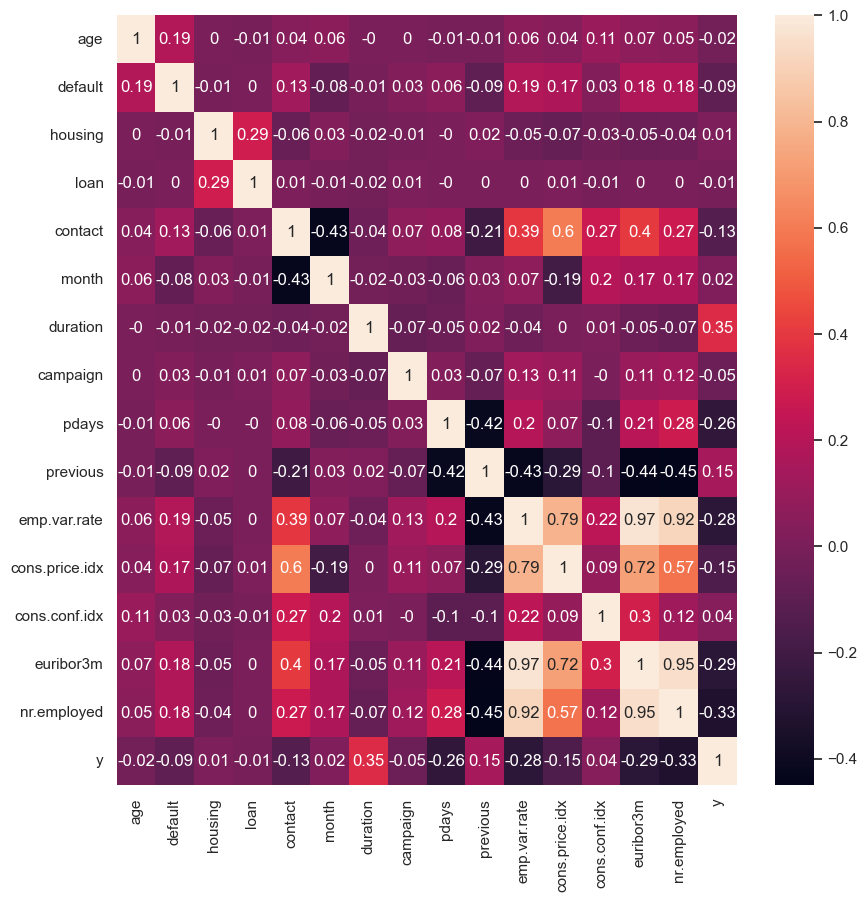

In [19]:
numeric = df.select_dtypes(include='number').columns.tolist()
corr = df[numeric].corr().apply(lambda x: round(x, 2))
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(data=corr, annot=True, ax=ax)

In [20]:
#emp.var.rate, nr.employed i euribor3m imaju skoro pa 1.0 korelaciju pa jedna od navedenih kolona moze da se otkloni

df = df.drop(columns = ['emp.var.rate', 'nr.employed'])


In [21]:
one_hot_cols = ['job', 'contact', 'marital',
                'education', 'month', 'day_of_week', 'poutcome', 'age','pdays','previous']  # probaj i age bez one hot
df = pd.get_dummies(data=df, columns=one_hot_cols).astype('float64')
df.head()

,default,housing,loan,duration,campaign,cons.price.idx,cons.conf.idx,euribor3m,y,job_admin.,...,age_1.0,age_2.0,age_3.0,age_4.0,pdays_3,pdays_6,pdays_999,previous_0,previous_1,previous_2
0,0.0,0.0,0.0,5.568345,0.0,93.994,-36.4,4.857,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
1,2.0,0.0,0.0,5.010635,0.0,93.994,-36.4,4.857,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.0,1.0,0.0,5.424950,0.0,93.994,-36.4,4.857,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.0,0.0,0.0,5.023881,0.0,93.994,-36.4,4.857,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.0,0.0,1.0,5.730100,0.0,93.994,-36.4,4.857,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


In [85]:
df.dtypes

housing           float64
loan              float64
duration          float64
campaign          float64
cons.price.idx    float64
                   ...   
previous_3        float64
previous_4        float64
previous_5        float64
previous_6        float64
previous_7        float64
Length: 84, dtype: object

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41061 entries, 0 to 41187
Data columns (total 84 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   housing                        41061 non-null  float64
 1   loan                           41061 non-null  float64
 2   duration                       41061 non-null  float64
 3   campaign                       41061 non-null  float64
 4   cons.price.idx                 41061 non-null  float64
 5   cons.conf.idx                  41061 non-null  float64
 6   euribor3m                      41061 non-null  float64
 7   nr.employed                    41061 non-null  float64
 8   y                              41061 non-null  float64
 9   job_admin.                     41061 non-null  float64
 10  job_blue-collar                41061 non-null  float64
 11  job_entrepreneur               41061 non-null  float64
 12  job_housemaid                  41061 non-null  floa

In [22]:
def k_neares_neighbor(df):
    nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(df)
    distances, indices = nbrs.kneighbors(df)

    return indices

def form_list(df,indices,column_name, value):
    pom = list()

    for pairs in indices:
        row = df.iloc[pairs[0]]
        row2 = df.iloc[pairs[1]]
        if(row[column_name] == value or row2[column_name] == value):
            pom.append(pairs)

    return pom        


In [23]:
def calculate_percentage(list, column_name, value):
    percentage = [0,0]
    for pairs in list:
        row = df.iloc[pairs[0]]
        row2 = df.iloc[pairs[1]]

        if(row[column_name] != value):
            percentage[int(row[column_name])] += 1
        elif (row2[column_name] != value):
            percentage[int(row2[column_name])] += 1
            
    return percentage        


In [24]:
percentages_h = [0,0]
percentages_l = [0,0]
percentage_def = [0,0]

indices = k_neares_neighbor(df)
housing = form_list(df,indices,'housing',2)
loan = form_list(df,indices,'loan',2)
default = form_list(df,indices,'default',2)

percentages_h = calculate_percentage(housing, 'housing',2)
percentages_l = calculate_percentage(loan, 'loan', 2)
percentages_def = calculate_percentage(default, 'default', 2)

df.loc[df['housing'] == 2, 'housing'] = 0 if (percentages_h[0] > percentages_h[1]) else 1
df.loc[df['loan'] == 2, 'loan'] = 0 if (percentages_h[0] > percentages_h[1]) else 1

In [29]:
df.loc[df['loan'] == 2, 'loan'] = 1

30402

<Axes: >

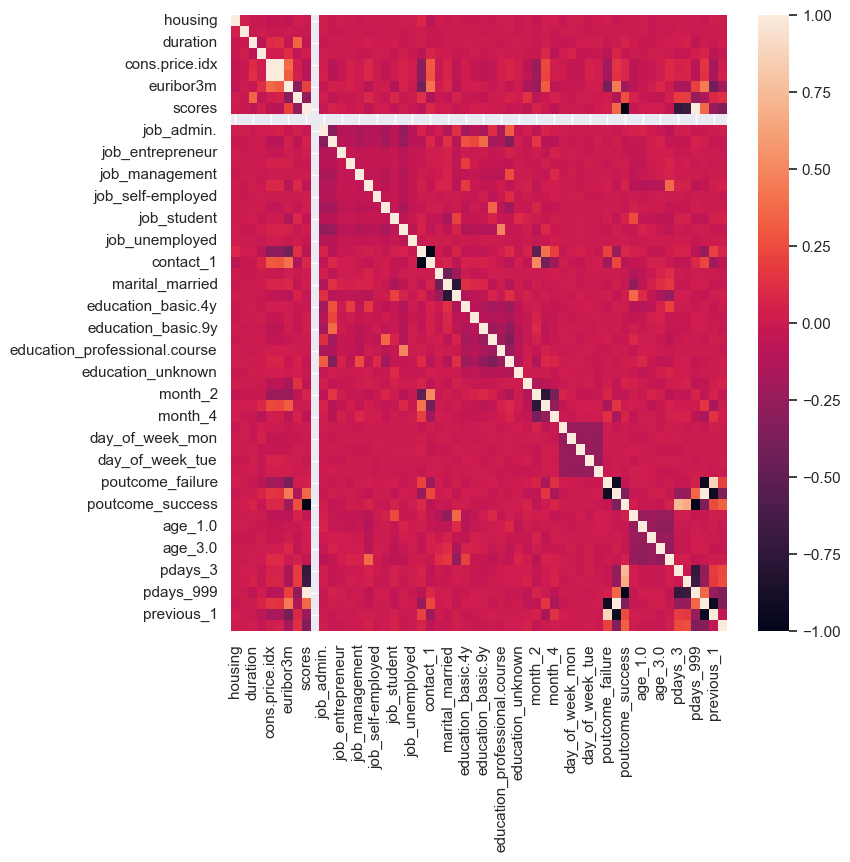

In [174]:
corr = df.corr().apply(lambda x: round(x, 2))
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(data=corr, annot=False, ax=ax)

In [176]:
#proveriti nakon uklanjanja outliera jer se u korelacionoj matrici dobija zavisnost sa odredjenim kolonama
df = df.drop(columns=['pdays_999', 'previous_2','previous_0', 'previous_1'])

<Axes: >

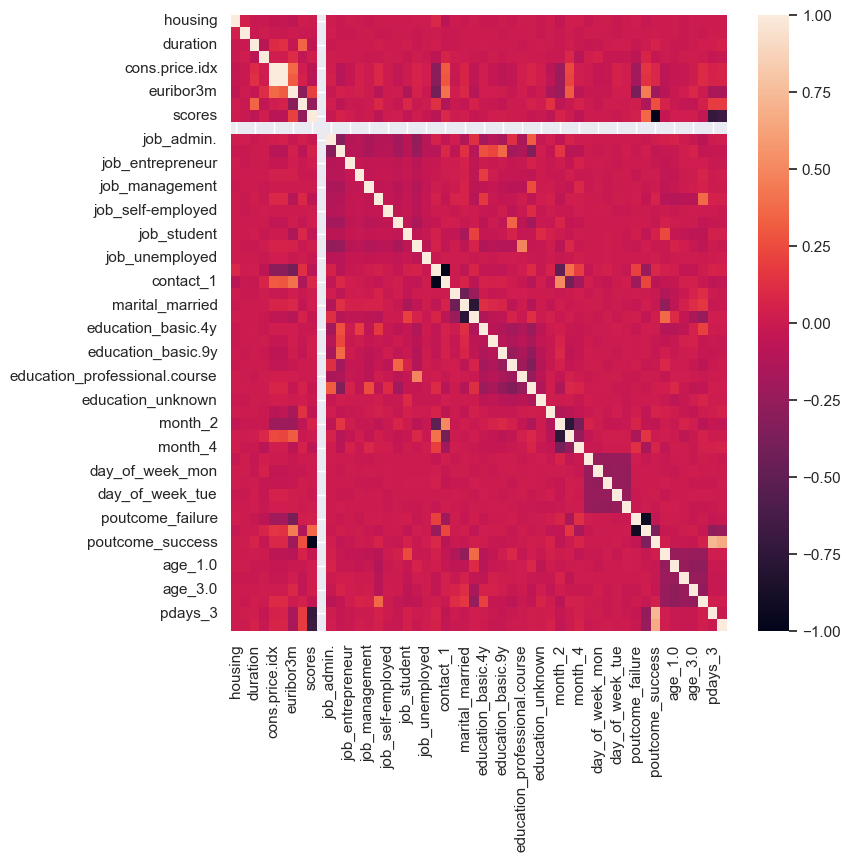

In [177]:
corr = df.corr().apply(lambda x: round(x, 2))
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(data=corr, annot=False, ax=ax)

## Isprobavanje modela


In [178]:
# Train test split
X = df.drop('y', axis=1)
y = df['y']

In [179]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y)

results = pd.DataFrame(
    columns=["Algorithm", "F1", "AUC", "Accuracy"])

<Axes: xlabel='y', ylabel='count'>

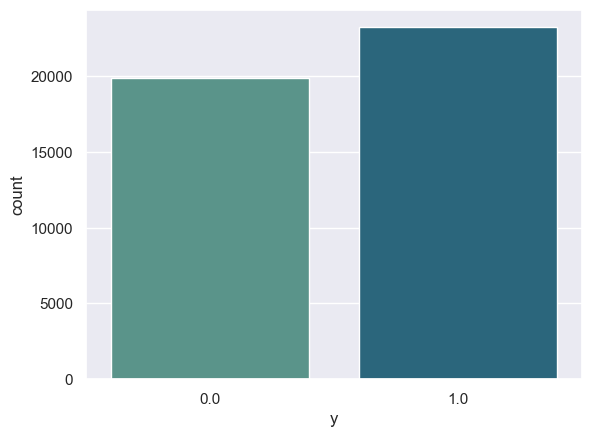

In [180]:
smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)
sns.countplot(x=y_resampled, palette=sns.color_palette("crest", 2))

In [181]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    if isinstance(cmap, str):
        cmap = plt.get_cmap(cmap)
    new_cmap = mpl.colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

cmap_base = 'inferno'
vmin, vmax = 0.4, 0.9
cmap = truncate_colormap(cmap_base, vmin, vmax)

In [182]:
def test_models(classifiers, X_train, X_test, y_train, y_test, results):
    sns.set_palette('hls')
    confusion_matrix_fig, confusion_matrix_ax =\
        plt.subplots(1, len(classifiers), figsize=(
            15, 4), constrained_layout=True,)
    all_curves_fig, all_curves_ax = plt.subplots(figsize=(10, 10))
    for i, name in enumerate(classifiers):
        classifier = classifiers[name]
        classifier.fit(X_train, y_train)

        if hasattr(classifier, 'predict_proba'):
            y_pred_prob = classifier.predict_proba(X_test)[:, 1]
        elif hasattr(classifier, 'decision_function'):
            decision_function = classifier.decision_function(X_test)
            y_pred_prob = 1 / (1 + np.exp(-decision_function))
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        roc_auc = auc(fpr, tpr)

        print(name+':DONE', end='; ')

        pred = classifier.predict(X_test)
        f1 = f1_score(y_test, pred)
        acc = accuracy_score(y_test, pred)

        row = {'Algorithm': name, 'F1': f1, 'AUC': roc_auc, 'Accuracy': acc}
        results = pd.concat([pd.DataFrame([row]), results], ignore_index=True)

        all_curves_ax.plot(fpr, tpr, lw=2,
                           label=f'{name} (AUC = {roc_auc:.2f})')

        cm = confusion_matrix(y_test, pred)
        ConfusionMatrixDisplay(cm).plot(
            ax=confusion_matrix_ax[i], colorbar=False,cmap = cmap)
        confusion_matrix_ax[i].grid(False)
        confusion_matrix_ax[i].set_title(name)

    all_curves_ax.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
    all_curves_ax.set_title('All ROC Curves')
    all_curves_ax.set_xlabel('False Positive Rate')
    all_curves_ax.set_ylabel('True Positive Rate')
    all_curves_ax.legend(loc='lower right')
    all_curves_fig.show()
    confusion_matrix_fig.show()
    results.sort_values(by='AUC', ascending=False)
    return results

Random Forest:DONE; AdaBoost:DONE; Bagging:DONE; Logistic Regression:DONE; Ridge:DONE; 

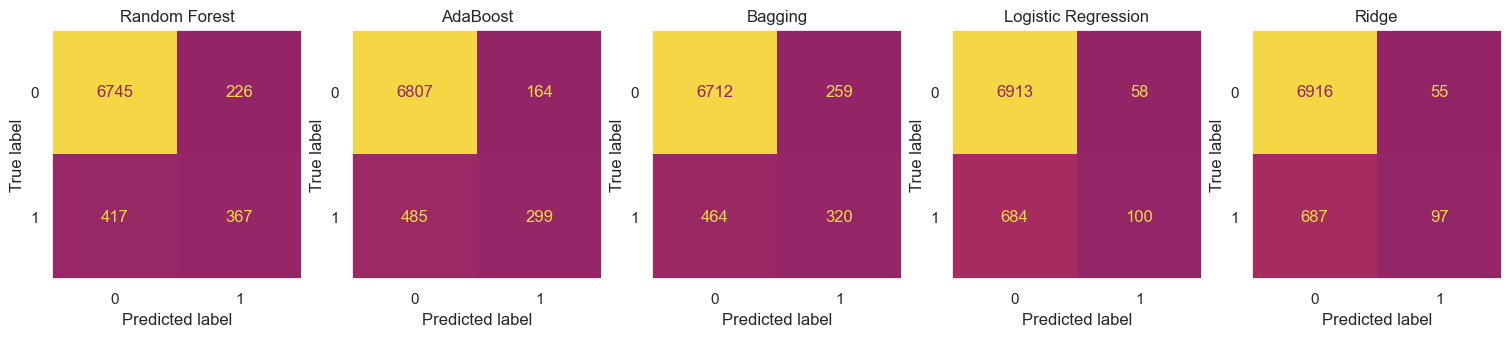

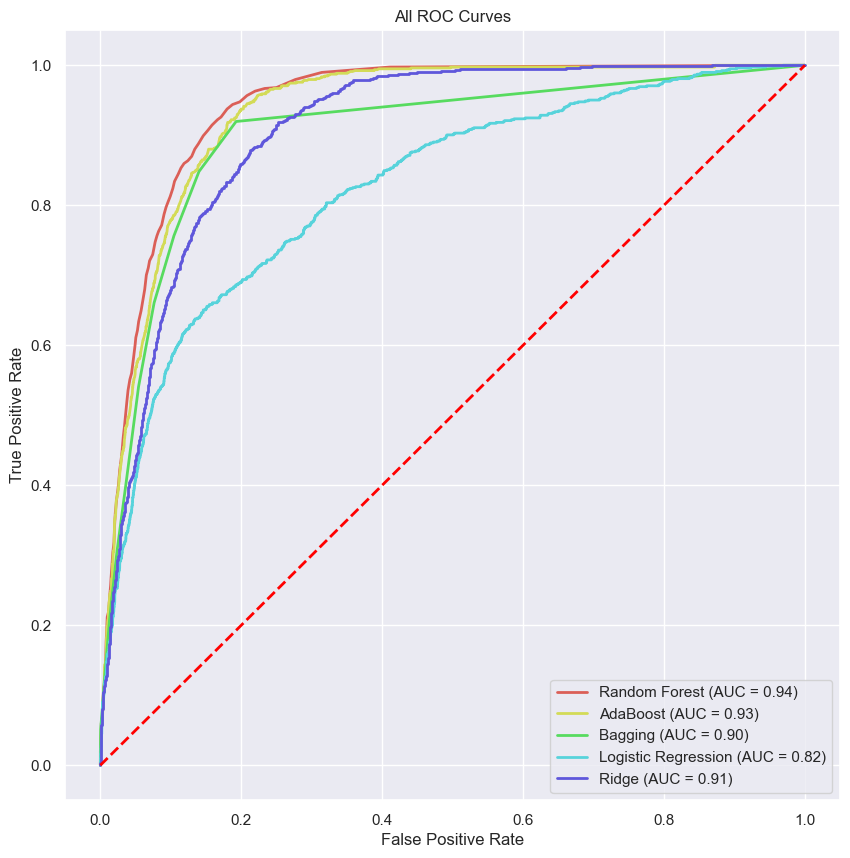

In [183]:
classifiers = {
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Bagging': BaggingClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Ridge': RidgeClassifier(),
}
results = test_models(classifiers, X_train, X_test, y_train, y_test, results)


Random Forest (balanced):DONE; AdaBoost (balanced):DONE; Bagging (balanced):DONE; Logistic Regression (balanced):DONE; Ridge (balanced):DONE; 

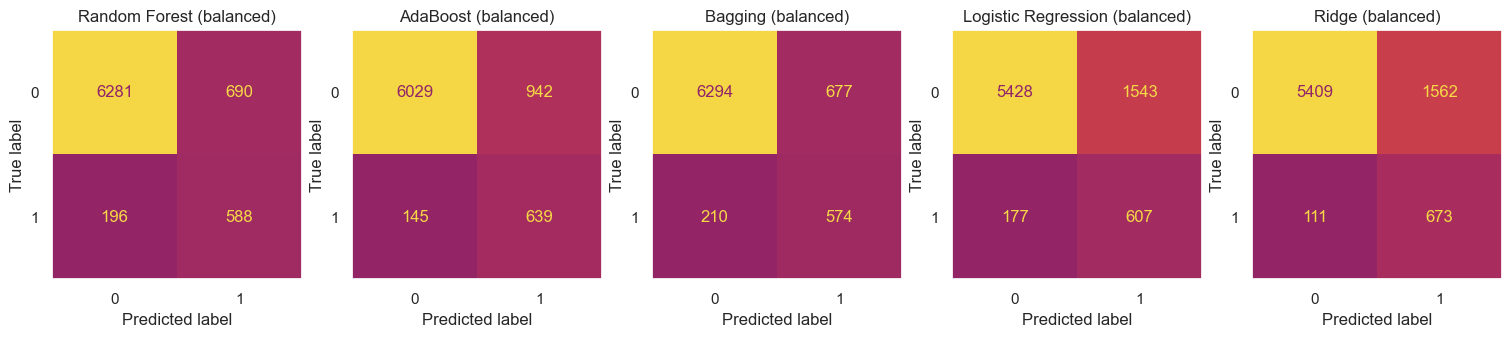

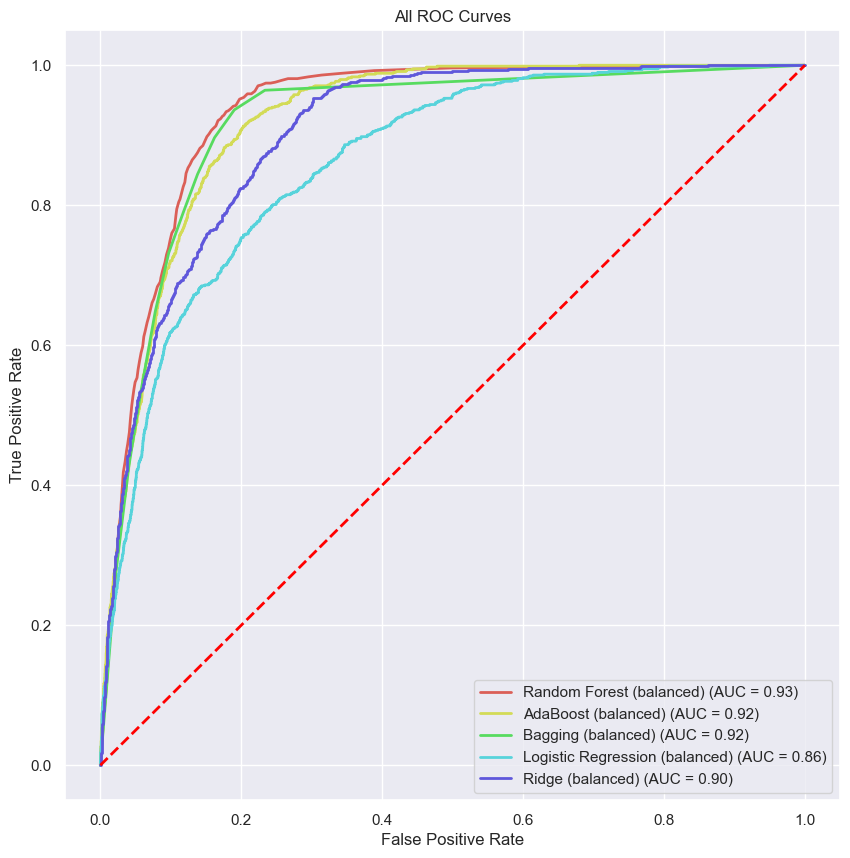

In [184]:
classifiers_balanced = {
    'Random Forest (balanced)': RandomForestClassifier(),
    'AdaBoost (balanced)': AdaBoostClassifier(),
    'Bagging (balanced)': BaggingClassifier(),
    'Logistic Regression (balanced)': LogisticRegression(),
    'Ridge (balanced)': RidgeClassifier(),
}
results = test_models(classifiers_balanced, X_resampled,
                      X_test, y_resampled, y_test, results)

In [185]:
results.sort_values(by='F1', ascending=False)

,Algorithm,F1,AUC,Accuracy
4,Random Forest (balanced),0.570320,0.931368,0.885751
2,Bagging (balanced),0.564128,0.915953,0.885622
3,AdaBoost (balanced),0.540381,0.920165,0.859832
9,Random Forest,0.533043,0.939981,0.917086
8,AdaBoost,0.479551,0.931947,0.916312
7,Bagging,0.469552,0.900489,0.906770
0,Ridge (balanced),0.445843,0.902902,0.784268
1,Logistic Regression (balanced),0.413770,0.863267,0.778208
6,Logistic Regression,0.212314,0.824574,0.904320
5,Ridge,0.207265,0.906067,0.904320
